In [1]:
#import utils
from utils import structure_factor
#import signac
#import matplotlib.pyplot as plt
#import gsd.hoomd
#import hoomd
#import freud
#import numpy as np

In [8]:
data = "../bto-trajectory.gsd"

In [5]:
def rdf(gsd_file, start=0, stop=-1, bins=50, r_max=2):
    with gsd.hoomd.open(gsd_file, "rb") as f:
        snap = f[0]
        rdf = freud.density.RDF(bins, r_max)
        for snap in f[start:stop]:
            box = snap.configuration.box
            points = snap.particles.position
            if not r_max:
                r_max = np.nextafter(
                    np.max(snap.configuration.box[:3]) * 0.3, 0, dtype=np.float32
                )
    rdf.compute((box,points))
    return rdf

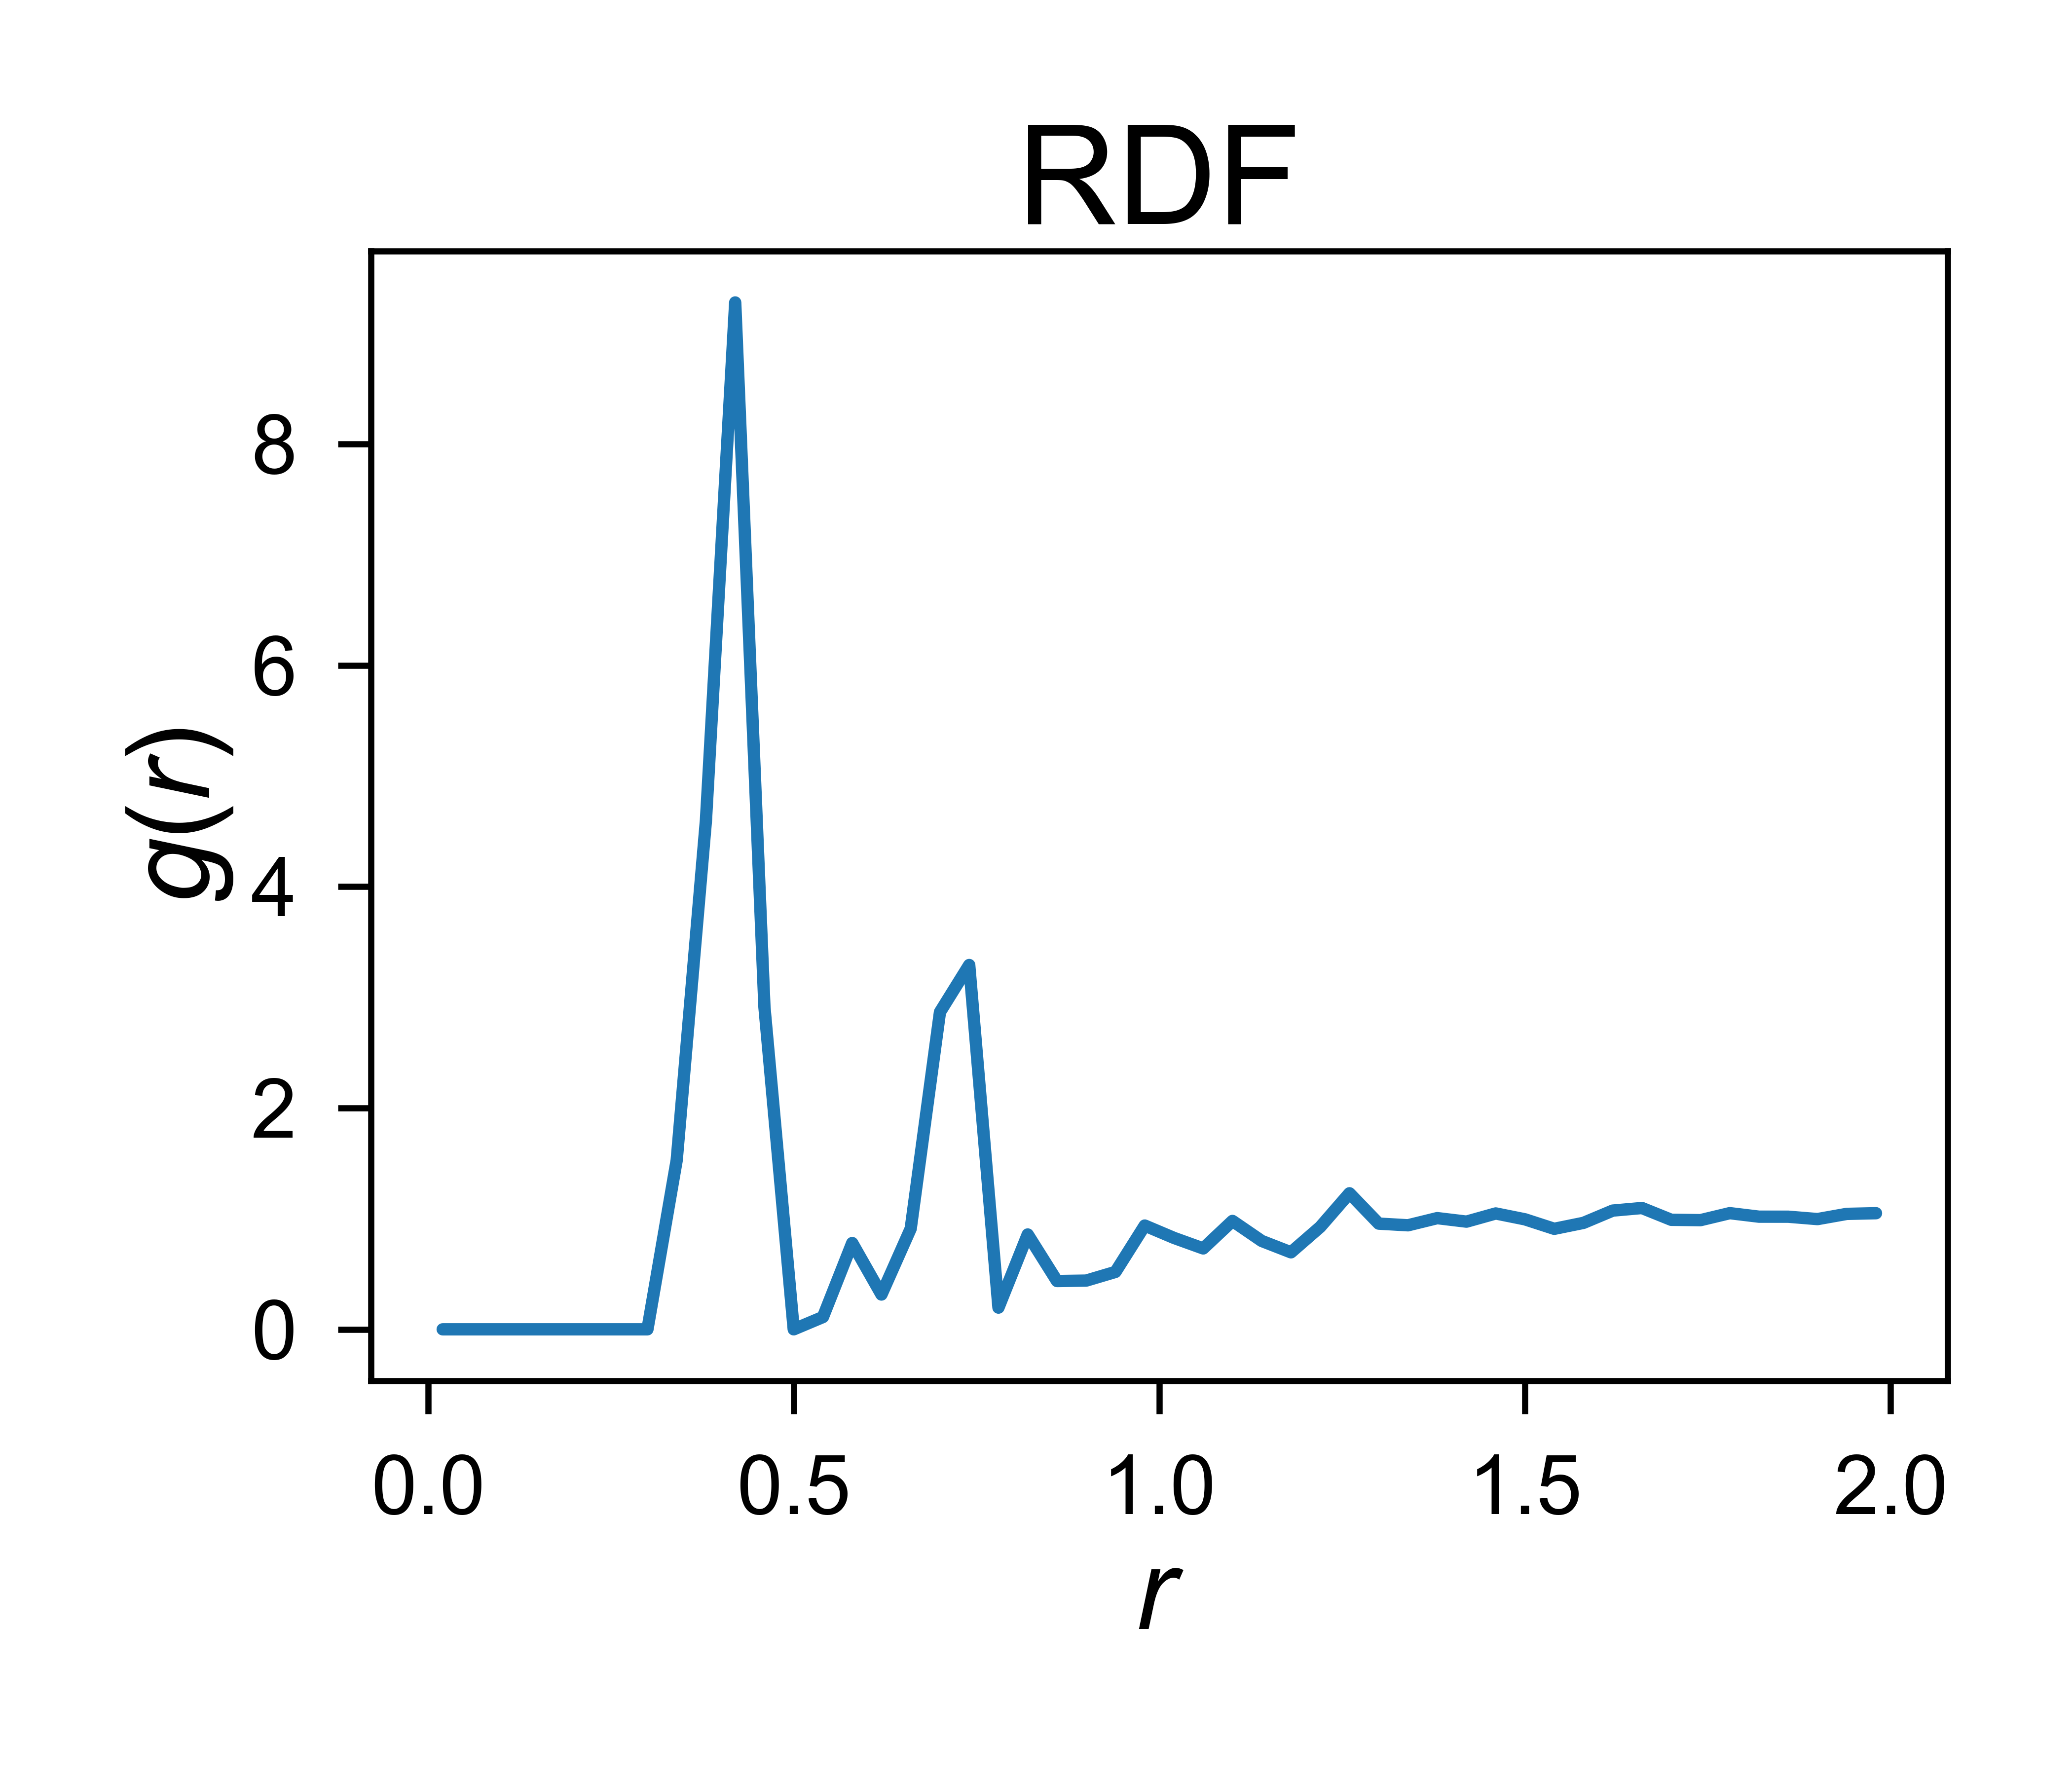

<Figure size 700x600 with 0 Axes>

In [9]:
rdf(data)

In [50]:
def avg_nn(gsd_file, frame=-1, r_max=2):
    with gsd.hoomd.open(gsd_file) as f:
        snap = f[frame]
        box = snap.configuration.box
        points = snap.particles.position
        frame_avg_nn = []
        aq = freud.locality.AABBQuery(box, points)
        nlist = aq.query(points, {'r_max': 3}).toNeighborList()
        neighbors = []
        for i in range(snap.particles.N):
            neighbors.append(np.where(nlist[:, 0] == i)[0].shape[0]-1)
            frame_avg_nn.append(np.average(neighbors))
    return np.average(frame_avg_nn)

In [3]:
avg_nn(data)

151.4033064373306

In [43]:
data = "../bto-trajectory.gsd"
frame=-1
with gsd.hoomd.open(data) as f:
    snap = f[frame]
    help(snap.particles)

Help on ParticleData in module gsd.hoomd object:

class ParticleData(builtins.object)
 |  Store particle data chunks.
 |  
 |  Use the `Snapshot.particles` attribute of a to access the particles.
 |  
 |  Instances resulting from file read operations will always store array
 |  quantities in `numpy.ndarray` objects of the defined types. User created
 |  snapshots may provide input data that can be converted to a `numpy.ndarray`.
 |  
 |  See Also:
 |      `hoomd.State` for a full description of how HOOMD interprets this
 |      data.
 |  
 |  Attributes:
 |      N (int): Number of particles in the snapshot (:chunk:`particles/N`).
 |  
 |      types (tuple[str]):
 |          Names of the particle types (:chunk:`particles/types`).
 |  
 |      position ((*N*, 3) `numpy.ndarray` of ``numpy.float32``):
 |          Particle position (:chunk:`particles/position`).
 |  
 |      orientation ((*N*, 4) `numpy.ndarray` of ``numpy.float32``):
 |          Particle orientation. (:chunk:`particles/or

In [2]:
#data = "../bto-trajectory.gsd"
def structure_factor(gsd_file, frame=-1, num_k_values=100, k_max=10):
    with gsd.hoomd.open(gsd_file) as f:
        snap = f[frame]
        box = snap.configuration.box
        points = snap.particles.position
        #box = freud.Box.from_box(snap.configuration.box) 
        sf = freud.diffraction.StaticStructureFactorDirect(
            bins=100, k_max=8
        )
        s = sf.compute((box, points))
    return s

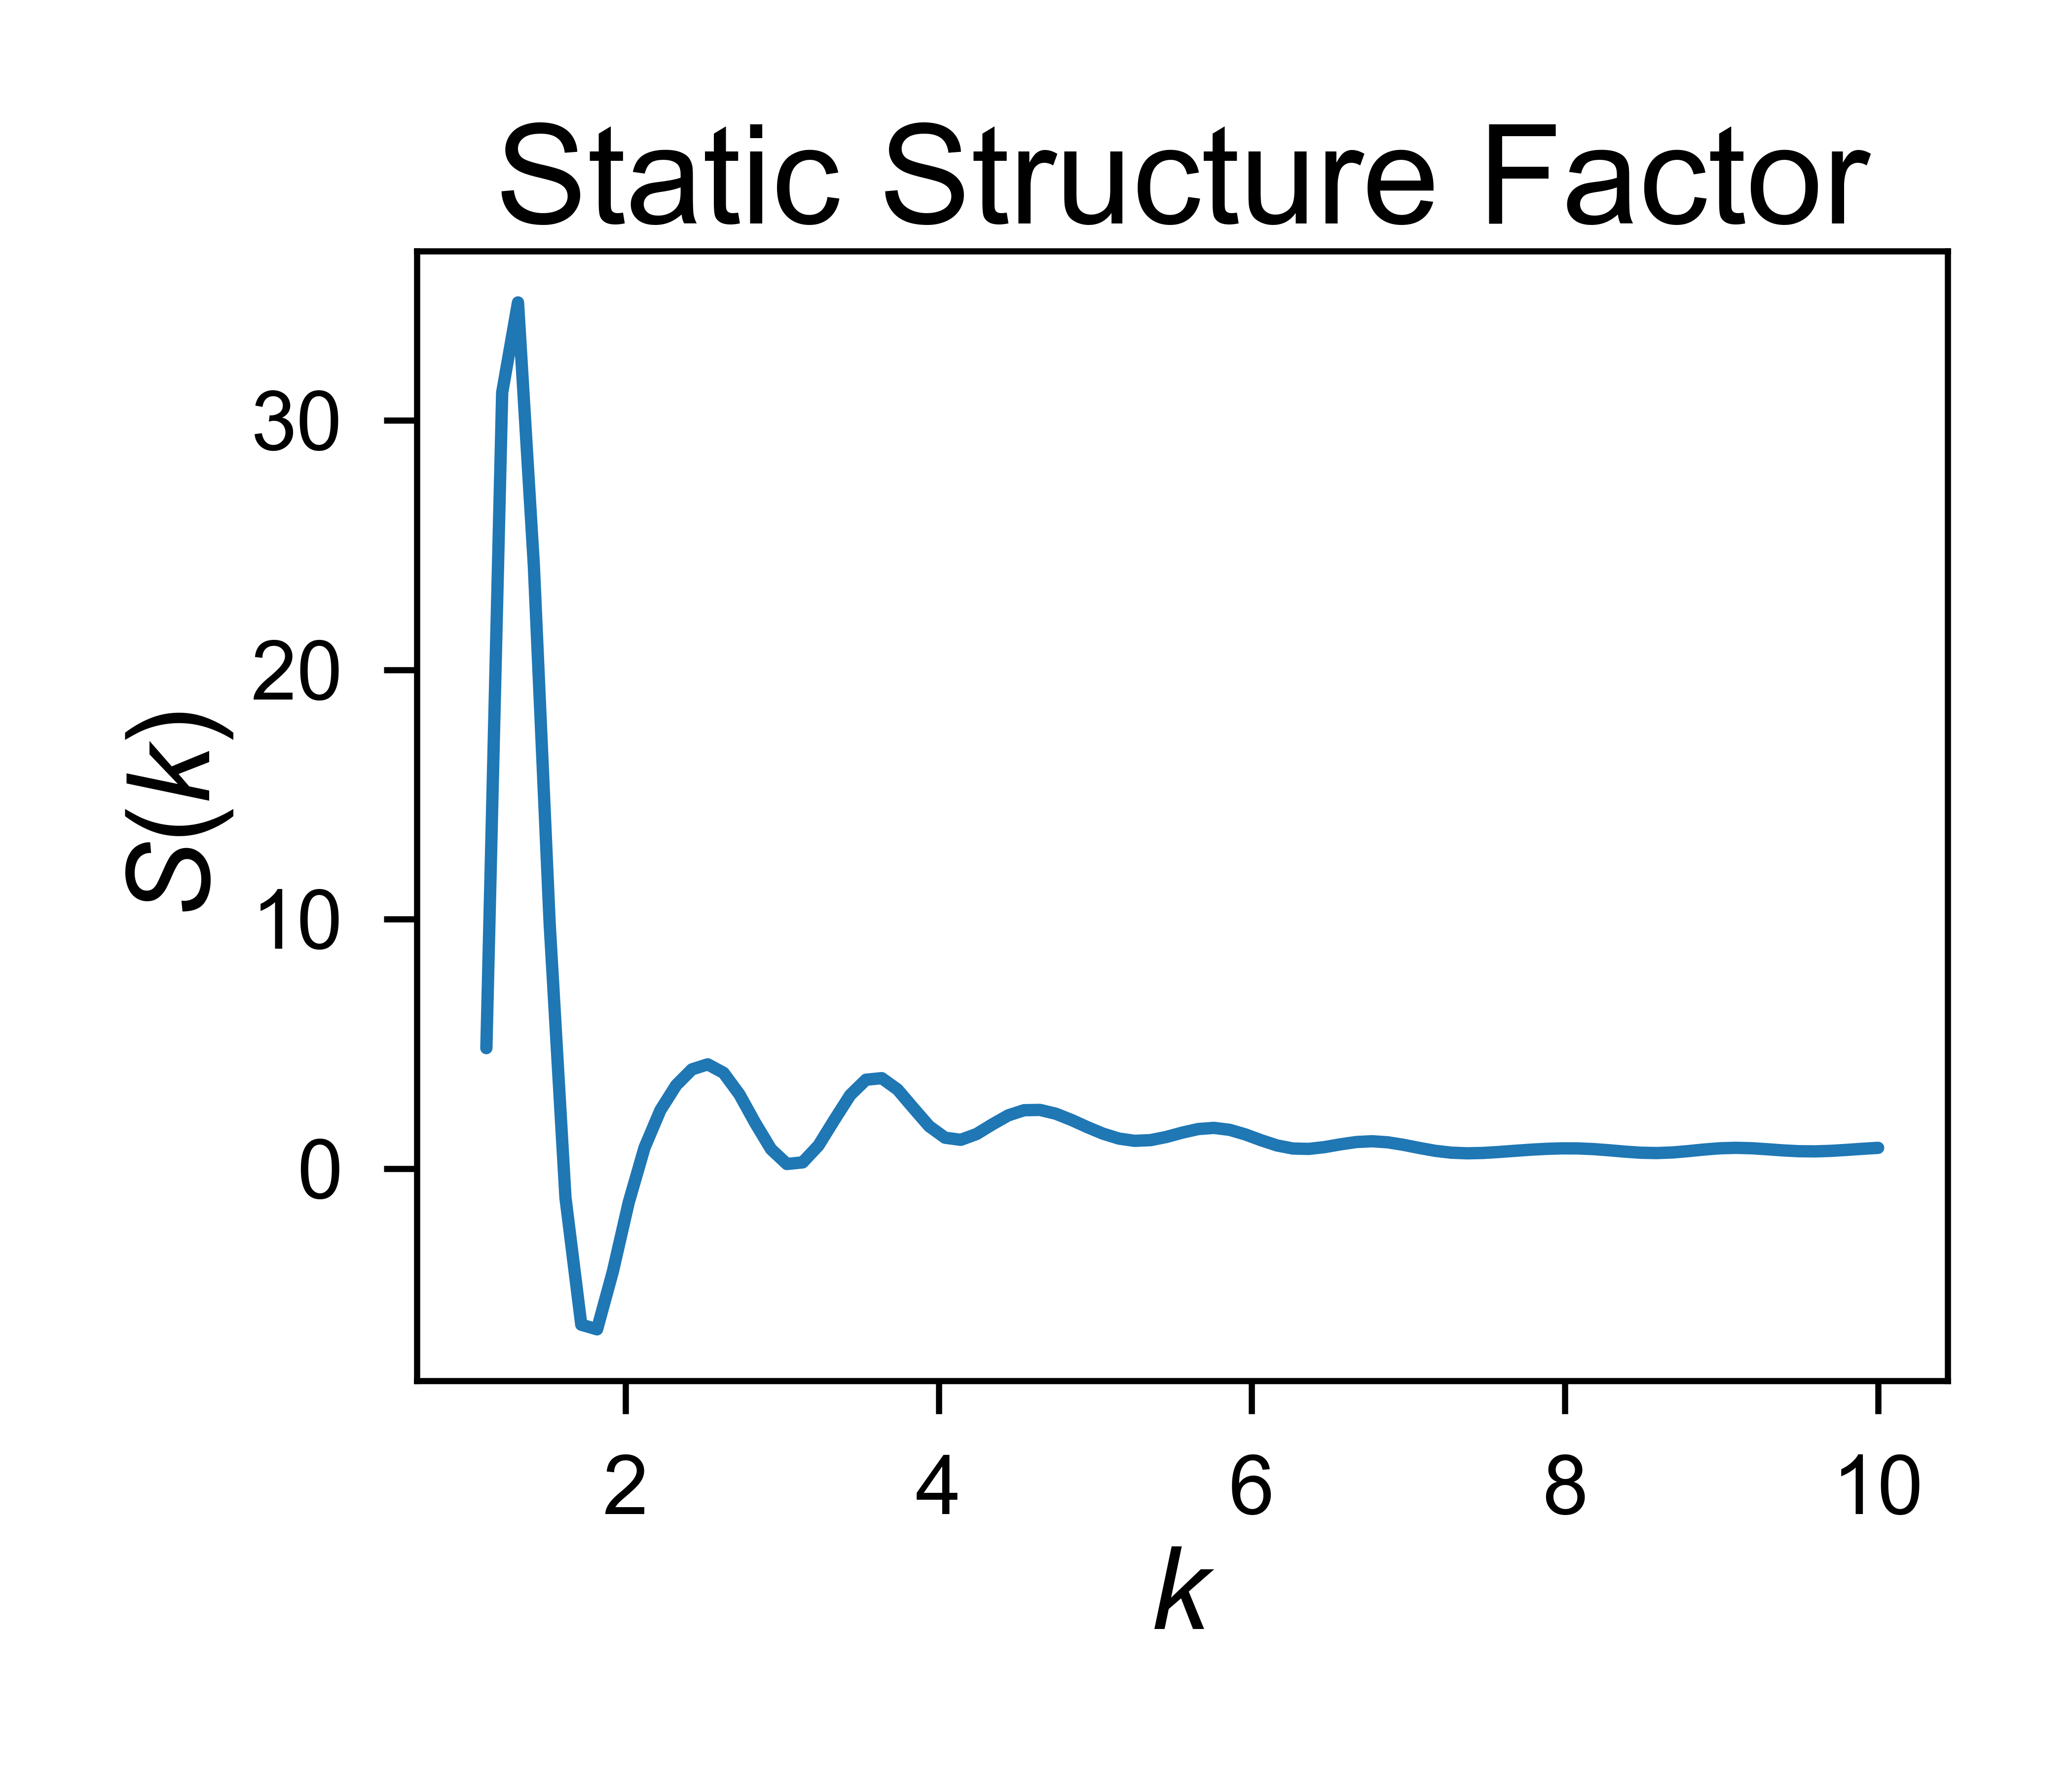

<Figure size 700x600 with 0 Axes>

In [2]:
data = "../bto-trajectory.gsd"
structure_factor(data, start=-3, stop=-1)